## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [125]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
% matplotlib inline
# Firstly setting the seed to assure you get the same answers on 
#quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [126]:
df = pd.read_csv('ab_data.csv')
df.head()
# this step is to read and show a sample of the dataset 

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [127]:
len(df)
# we extract the number of rows in the dataset

294478

c. The number of unique users in the dataset.

In [128]:
df.user_id.nunique()
# we extract the number of unique users in the dataset

290584

d. The proportion of users converted.

In [129]:
df['converted'].mean()
# we extract the users converted proportion 

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [130]:
[df.query("group == 'treatment' and landing_page != 'new_page'")  +
df.query("group == 'control' and landing_page != 'old_page'")]

# we caluclate the number of times that new_page and treatment 
# don't match which is 3893

[        user_id timestamp group landing_page  converted
 22          NaN       NaN   NaN          NaN        NaN
 240         NaN       NaN   NaN          NaN        NaN
 308         NaN       NaN   NaN          NaN        NaN
 327         NaN       NaN   NaN          NaN        NaN
 357         NaN       NaN   NaN          NaN        NaN
 490         NaN       NaN   NaN          NaN        NaN
 685         NaN       NaN   NaN          NaN        NaN
 713         NaN       NaN   NaN          NaN        NaN
 776         NaN       NaN   NaN          NaN        NaN
 846         NaN       NaN   NaN          NaN        NaN
 850         NaN       NaN   NaN          NaN        NaN
 889         NaN       NaN   NaN          NaN        NaN
 988         NaN       NaN   NaN          NaN        NaN
 1037        NaN       NaN   NaN          NaN        NaN
 1106        NaN       NaN   NaN          NaN        NaN
 1198        NaN       NaN   NaN          NaN        NaN
 1354        NaN       NaN   Na

f. Do any of the rows have missing values?

In [131]:
df.info()
# here we lookup for missing values which there is none in this case

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [132]:
df2 = df.query("group == 'treatment' and landing_page == 'new_page'")
df2 = df2.append(df.query("group == 'control' and landing_page == 'old_page'"))
df2.shape[0]
# defining df2 and calculate the rows

290585

In [133]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]
# checking all of the correct rows were removed

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [134]:
len(df2['user_id'].unique()) 
df2.user_id.nunique()
# we extract the number of unique users in df2

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [135]:
df2[df2['user_id'].duplicated()] 
# we extract the duplicated user_id in df2

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [136]:
df2[df2['user_id'] == 773192]
# we extract the row information for the duplicated user_id in df2

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [137]:
df2 = df2.drop_duplicates()
# we remove one of the duplicated rows

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [138]:
df2['converted'].mean()
# we extract the individual proability of converting 
# in df2 regardless of the page they receive

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [139]:
df2.query("group == 'control'")['converted'].mean() 
# we extract the control group converted proportion in df2

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [140]:
df2.query("group == 'treatment'")['converted'].mean() 
# we extract the treatment group converted proportion in df2

0.11880724790277405

d. What is the probability that an individual received the new page?

In [141]:
df2.query("landing_page == 'new_page'").shape[0]/df2.shape[0]
# we extract the individual probability of receiving the new page, as it
#appers to be half of the chance which insure the there are a slight 
# difference between old and new conversions 

0.5000636646764286

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**According to the result above there are slight difference between conversion rate in the favor of the old control page as it appears to be higher and more beneficial, perhaps it needs further evidence thats why we moves to A/B test.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0: p new−p old ≤ 0**

**H1: p new−p old > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [142]:
p_new = df2['converted'].mean()
p_new
# we extract the new page conversion rate 

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [143]:
p_old = df2['converted'].mean()
p_old
# we extract the old page conversion rate 

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [144]:
n_new = df2.query("landing_page == 'new_page'").shape[0]
n_new
# we extract the treatment group number

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [145]:
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_old
# we extract the control group number

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [146]:
new_page_converted = np.random.binomial(1,p_new, n_new )
# we simulate the transactions with new_page_converted rate

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [147]:
old_page_converted = np.random.binomial(1,p_old, n_old )
# we simulate the transactions with old_page_converted rate

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [148]:
new_page_converted.mean() - old_page_converted.mean()
# we calculate the difference between the old and new simulated values

0.0023852706851688193

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [149]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

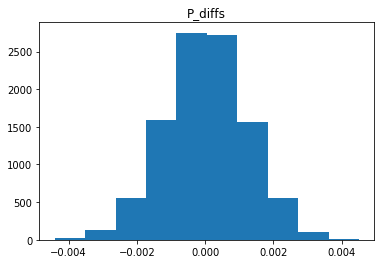

In [150]:
plt.hist(p_diffs)
plt.title('P_diffs')
plt.show()
# we create histogram of the p_diffs

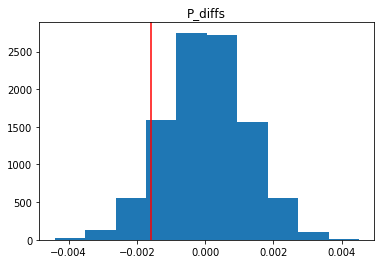

In [151]:
obs_diff = df2.query("group == 'treatment'")['converted'].mean() - df2.query("group == 'control'")['converted'].mean()
plt.hist(p_diffs)
plt.title('P_diffs')
plt.axvline(x=obs_diff, color="red")
plt.show()
# we simulate differences in conversion proportion

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [152]:
(p_diffs >= obs_diff).mean()
# the proportion of p_diffs greater than the actual observed difference

0.91259999999999997

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**We computed the the P-value, in this case the P-value is 0.90 which is  > 0.05, it is not statistically significant and indicates strong evidence for the null hypothesis , as a result we fail to reject it .**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [153]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control'")['converted'].sum()
convert_new = df2.query("group == 'treatment'")['converted'].sum()
n_old = df2.query("landing_page == 'new_page'").shape[0]
n_new = df2.query("landing_page == 'old_page'").shape[0]

convert_old, convert_new , n_old , n_new
# calculate the number of conversions for each page
# ,as well as the number of individuals who received each page

(17489, 17264, 145311, 145274)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [154]:
z_score, p_value = sm.stats.proportions_ztest([convert_new,convert_old], [n_new,n_old],alternative='larger', prop_var=False)
(z_score,p_value)
# we compute ztest and p-value

(-1.261011806479853, 0.89634770327583912)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**After computing z-score and p-value, we found z-score to be 1.3 which is less than the value of 1.96 ,z-score is based on the fact that 95% of the area of a normal distribution is within 1.96 standard deviations of the mean,as a result we fail to reject the  null hypothesis.In addition, p-value is 0.9 > 0.05,which is similiar to "j" findings  as a result we fail to reject the null hypothesis .**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We will use logistic regression,which is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.**

b. The goal is to use **statsmodels.** to fit the regression model you specified in part **a.** . To see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received. Add an **intercept.** column, as well as an **ab_page.** column, which is 1 when an individual receives the **treatment.** and 0 if **control.**.

In [155]:
df2['intercept'] = 1
df2[['drop_page','ab_page']] = pd.get_dummies(df2['group'])
df2 = df2.drop('drop_page', axis=1)
df2.head()
# we added an intercept column, as well as an ab_page column

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [156]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
# we use statsmodels to instantiate our regression model 

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [157]:
results.summary2()
# we provide the summary of our model

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-28 18:12 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**P_value of ab_page  is 0.19 that is the p-value is 0.19 > 0.05,which gave us a diffrent value to above findings as a result we fail to reject the null hypothesis, that means using one sided test and two sided test gave us similar results(fail to reject the null hypothesis).**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is a good idea to consider other factors to add into our regression model to explore more and display different deductions. On the other hand, it has a disadvantage, which is adding multiple factors might lead to false conclusions.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [158]:
countries = pd.read_csv('countries.csv')
df3 = df2.set_index('user_id').join(countries.set_index('user_id'))
df3.head()
# firstly, we  read in the countries.csv dataset and 
# merge it with datasets on the appropriate row

,timestamp,group,landing_page,converted,intercept,ab_page,country
user_id,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US


In [159]:
df3.country.unique()
# we extract the unique values in the country column

array(['US', 'UK', 'CA'], dtype=object)

In [160]:
df3[['US', 'UK', 'CA']] = pd.get_dummies(df3['country'])
df3.head()
# we create dummy variables for these country columns

,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA
user_id,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,US,0,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,US,0,0,1
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,0,US,0,0,1
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,US,0,0,1
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,US,0,0,1


In [161]:
logit_mod = sm.Logit(df3['converted'], df3[['intercept', 'UK', 'CA']])
results = logit_mod.fit()
results.summary2()
# we creates a logistic regression model,
#'US' is the base variable here

Optimization terminated successfully.
         Current function value: 0.366115
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-06-28 18:12 AIC:              212781.0880
No. Observations:   290585           BIC:              212812.8269
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
CA             0.0408    0.0269    1.5176  0.1291  -0.0119   0.0935
==================================================================

"""

**After adding countries the result are still the same based on the P-values which is above 0.05, as a result we fail to reject the null hypothesis , countries doesn't have a siginficant impact on conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [162]:
df3['intercept']=1
Xvars=[ 'intercept','UK','CA' ]
lm = sm.Logit (df3['ab_page'],df3[Xvars ] ) 
results = lm.fit()
results.summary2()
 # we made an interaction between page and country

Optimization terminated successfully.
         Current function value: 0.760074
         Iterations 3


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   3.0000     
Dependent Variable: ab_page          Pseudo R-squared: -0.123     
Date:               2020-06-28 18:12 AIC:              441738.4142
No. Observations:   290585           BIC:              441770.1531
Df Model:           2                Log-Likelihood:   -2.2087e+05
Df Residuals:       290582           LL-Null:          -1.9676e+05
Converged:          1.0000           Scale:            1.0000     
--------------------------------------------------------------------
             Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
--------------------------------------------------------------------
intercept    0.0142     0.0166    0.8554   0.3923   -0.0183   0.0468
UK          -0.0212     0.0182   -1.1661   0.2436   -0.0569   0.0144
CA          -0.0124     0.0172   -0.7191   0.4721   -0.0461   0.0213
==================================================================

"""

**After making an interaction between page and countries we found that countries P-values where larger than 0.05.Which confirm the above results  "we fail to reject the null hypothesis".**

**Conclusion:**


In conclusion, we will stay using the old page since the new page does not have a sufficient evidence to reject the null hypothesis based on our testing.


        

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [163]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0